# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     2.952146e+01     7.222297e+00
 * time: 0.005327939987182617
     1     2.801554e+01     5.271877e+00
 * time: 0.016405105590820312
     2     1.648370e+01     2.982406e+00
 * time: 0.049299001693725586
     3     1.273515e+01     2.079527e+00
 * time: 0.07475996017456055
     4     1.224222e+01     2.678593e+00
 * time: 0.09500789642333984
     5     1.141426e+01     1.471110e+00
 * time: 0.11400103569030762
     6     1.054949e+01     1.272939e+00
 * time: 0.1332550048828125
     7     9.979059e+00     1.216813e+00
 * time: 0.15244102478027344
     8     9.727113e+00     8.390952e-01
 * time: 0.1714019775390625
     9     9.510522e+00     8.236258e-01
 * time: 0.1905670166015625
    10     9.504796e+00     1.144131e+00
 * time: 0.20456910133361816
    11     9.479550e+00     1.231683e+00
 * time: 0.21910691261291504
    12     9.373961e+00     6.408947e-01
 * time: 0.23868799209594727
    13     9.239225e+00     6.517873e-01
 * time:

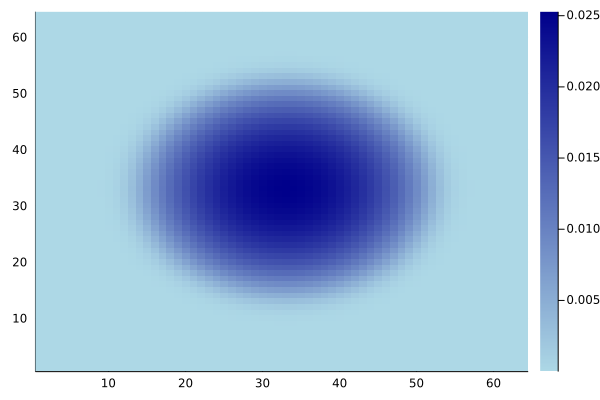

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)